In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uniform distribution
- Uniform means the probability of each outcome is even. This is flipping a coin or rolling dice
    - discrete is `.randint`
    - continuous is `.uniform`

In [4]:
# .randint returns a distribution object
die_distribution = stats.randint(1, 7)

In [8]:
# methods we can call on the distribution
# .rvs pulls random values
# the argument gives us 
die_distribution.rvs(10)

array([3, 6, 6, 1, 1, 4, 1, 6, 5, 1])

In [21]:
# Pick 100 trials of rolling 2 dice
# Sending in a tuple gives us n_trials of n_events in the trial
die_distribution.rvs((4, 2))

array([[4, 3],
       [6, 4],
       [3, 2],
       [1, 2]])

In [ ]:
# Focus on the shape of the interaction

In [9]:
# What is the likelihood we roll a 4?
# .pmf for the probability mass function
die_distribution.pmf(4)

0.16666666666666666

In [ ]:
# What is the probability of rolling a 3 or less
die_distribution.cdf(3)

In [10]:
# What is probability of rolling greater than 2
# This is a survival function
die_distribution.sf(2)

0.6666666666666667

## Probability Mass Function
- .pmf to look for the likelihood of one specific value (likelihood we roll exactly a 3)
- `die_distribution = stats.randint(1, 7)`
- `die_distribution.pmf(3)`

## Cummulative Density Function
- .cdf for probability of an event of n or less (likelihood of rolling a 3 or less)
- `die_distribution = stats.randint(1, 7)`
- `die_distribution.cdf(3)`

## Survival Function
- .sf for survival is likelihood of rolling greater than 2
- `die_distribution = stats.randint(1, 7)`
- `die_distribution.sf(2)` 

In [28]:
# what's the p(rolling a 1 on one die)
die_dist = stats.randint(1, 7)
die_dist.pmf(1)

0.16666666666666666

In [29]:
# What's the p(rolling greater than a 4?)
# greater than is survival function 
die_dist = stats.randint(1, 7)
die_dist.sf(4)

0.33333333333333337

In [32]:
# What's the p(50% of values will be greater than what number)
# We'll use inverse survival because "greather than" means survival
# And inverse survival function takes in probability and gives the number
die_dist.isf(.5)

3.0

In [ ]:
# What's the p(rolling 11 on 2d6)


## Normal Distribution
- Continuous random variable
- the mean $\mu$ is the center
- the standard deviation $\sigma$ is the "spread"

(array([1.300e+01, 1.800e+01, 5.300e+01, 1.530e+02, 2.800e+02, 5.530e+02,
        8.810e+02, 1.302e+03, 1.475e+03, 1.507e+03, 1.391e+03, 1.052e+03,
        6.680e+02, 3.800e+02, 1.720e+02, 7.200e+01, 1.700e+01, 1.000e+01,
        1.000e+00, 2.000e+00]),
 array([ 6.42117068,  6.81167249,  7.20217429,  7.5926761 ,  7.9831779 ,
         8.37367971,  8.76418151,  9.15468331,  9.54518512,  9.93568692,
        10.32618873, 10.71669053, 11.10719234, 11.49769414, 11.88819595,
        12.27869775, 12.66919955, 13.05970136, 13.45020316, 13.84070497,
        14.23120677]),
 <a list of 20 Patch objects>)

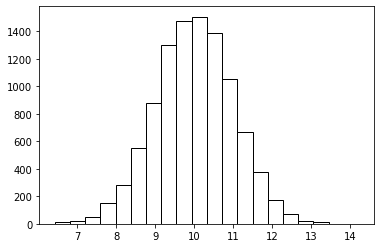

In [43]:
# .norm takes mean then standard deviation
coffee_consumption = stats.norm(10, 1)

# .rvs gets n amount
plt.hist(coffee_consumption.rvs(10_000), bins=20, ec="black", fc="white")

In [45]:
# what's the probability we'll consume less than 8.5 litres
# "LESS THAN" a number when we want probability means .cdf 
coffee_consumption.cdf(8.5)

0.02280417693265885

In [47]:
# What's the number of litres of coffee we'll consume 50% or less of the values
coffee_consumption.ppf(.5)

10.0

In [48]:
# How little coffee would we have to drink to be in the bottom quarter of all consumptipon?
# "less than" means .cdf or .ppf
# we have a probability and want a value, so it's going to be .ppf
coffee_consumption.ppf(.25)

9.325510249803918

In [52]:
# What's the probability that we'll drink more than 11 litres of coffee?
# "More than" with needing probability means .sf
coffee_consumption.sf(11)

0.15865525393145707

In [54]:
# Average internet consumption
# Our historical average is 1250GB +- 100GB
# Everyone is now working from home, omg!
internet_use = stats.norm(1250, 100)

In [57]:
# On Monday, we observed 1500GB of internet usage
# How likely is it we would see this number (or higher) due to chance?
stats.norm(1250, 100).sf(1500)

0.006209665325776132

## Binomial Distribution
- discrete random variable; "number of successes"
- $n$ number of trials (we model many many trials)
- $p$, probability of success for one trial
- The outcome of one trial is binary 

In [59]:
# there's a 70% chance a food truck shows up (and 30% it doesn't)
# What's the likelihood a food truck shows up two days out of the (work) week?
# Outcome is the number of days that a food truck shows up
# n trials is simulating 5 days in the week

In [67]:
# n is 5
# p = probability of the event is .7
n = 5
p = .7

# .pmf(2) because we're looking for a food turck exactly 2 days out of the week.
stats.binom(n, p).pmf(2)


0.1323

In [70]:
# What's the likelihood that a food truck shows up 3 or less days in a week?
n = 5
p = .7
stats.binom(n, p).cdf(3) # .cdf b/c we want the probability and we have "x or less"

0.47178000000000003

In [71]:
# What's the likelihood that a food truck shows up less than three days out of the week?
# We don't have a function that answers this, right now, we have a less than or equal to
# Rephrase this in order to use our functions
# likelihood a food truck shows up 2 or less days days out of the week?
n = 5
p = .7
# we have to transform the problem statement a little
# because .cdf is "less than or equal to"
stats.binom(n, p).cdf(2)

0.16308000000000006

In [72]:
# What's the likelihood that a food truck shows up less than three days out of the week?
# p(less than 3 days) is equal to
# p(3 or less days) - probability of exactly 3
stats.binom(n, p).cdf(3) - stats.binom(n, p).pmf(3)

0.1630800000000001

In [75]:
# What's the likelihood that a food truck shows up less than three days out of the week?
# 1 - probability of a truck showing up more than 2 times
# 1 - .sf percent
1 - stats.binom(n,p).sf(2)

0.1630800000000001

## Poisson Distribution
- discrete random variable; number of events
- discerte number of events over some time interval
    - emails per day
    - questions per hour
    - bugs per week
    - # of coffee break per day
    - typos per minute
- $\lambda$ is the average rate over time

In [ ]:
# Suppose students ask an average of 3.5 questions per lecture
# What is the likelihood that more than 4 questions are asked during the stats lesson

In [77]:
# We have a value and we're asking for a probability
# We're looking for greater than 3.5
# That tells us this is the survival function
stats.poisson(3.5).sf(4)

0.2745550466903957

Text(0.5, 0, '# of questions')

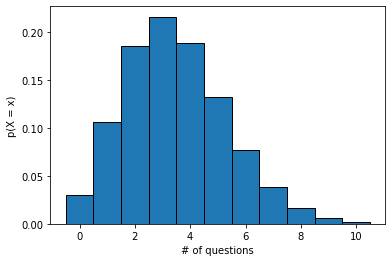

In [82]:
# x is events from 0 to 11
x = np.arange(0, 11)
y = stats.poisson(3.5).pmf(x)
plt.bar(x, y, ec="black", width=1)
plt.ylabel("p(X = x)") # X is our random variable, x is one specific value
plt.xlabel("# of questions")

In [84]:
# What's the likelihood that 2 or fewer questions are asked?
stats.poisson(3.5).cdf(2)

0.32084719886213414

In [85]:
# Let's model food trucks over time using a Poisson distribution
# Given p(food truck shows up in one day), number of days

# For poisson, we need an average over time
# On average, 3 food trucks show up per week
# For a given week, what's the likelihood that a food truck shows up every day?
# p(5 or more food trucks show up)?

# We don't have a function for 5 or more
# .sf(4) does give us the probability of more than 4 (which works b/c we don't have 4.3 food trucks)
stats.poisson(3).sf(4)


0.18473675547622787